In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

C:\Users\niimi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# CSVファイルの読み込み
file_path = 'spotify-2023.csv'  
spotify_data = pd.read_csv(file_path, encoding='ISO-8859-1')

In [3]:
# keyとmodeを数値に変換(データの前処理)
key_mapping = {'C': 0, 'C#': 1, 'D': 2, 'D#': 3, 'E': 4, 'F': 5, 'F#': 6, 'G': 7, 'G#': 8, 'A': 9, 'A#': 10, 'B': 11}
spotify_data['key'] = spotify_data['key'].map(key_mapping)

mode_mapping = {'Major': 1, 'Minor': 0}
spotify_data['mode'] = spotify_data['mode'].map(mode_mapping)

C:\Users\niimi\AppData\Local\Temp\ipykernel_25620\3397444263.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_clean['cluster'] = kmeans.fit_predict(X_scaled_clean)


          bpm       key          mode  danceability_%  valence_%   energy_%  \
0  127.131579  5.666667  5.087719e-01       72.850877  51.649123  60.833333   
1  121.651685  5.520599  1.000000e+00       70.082397  57.382022  71.936330   
2  119.912548  6.015209 -5.551115e-16       71.813688  56.752852  69.699620   
3  125.318471  6.407643  7.579618e-01       52.248408  33.248408  45.878981   
4  121.875000  5.687500  5.000000e-01       59.500000  29.812500  56.750000   

   acousticness_%  instrumentalness_%  liveness_%  speechiness_%  cluster  
0       27.982456            0.087719   15.228070      32.298246        0  
1       15.524345            0.617978   19.149813       7.205993        1  
2       17.661597            0.323194   19.376426       7.756654        2  
3       57.401274            1.242038   17.031847       5.522293        3  
4       31.437500           57.187500   14.062500       5.437500        4  


C:\Users\niimi\AppData\Local\Temp\ipykernel_25620\3397444263.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_clean['pca1'] = principal_components[:, 0]
C:\Users\niimi\AppData\Local\Temp\ipykernel_25620\3397444263.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spotify_data_clean['pca2'] = principal_components[:, 1]


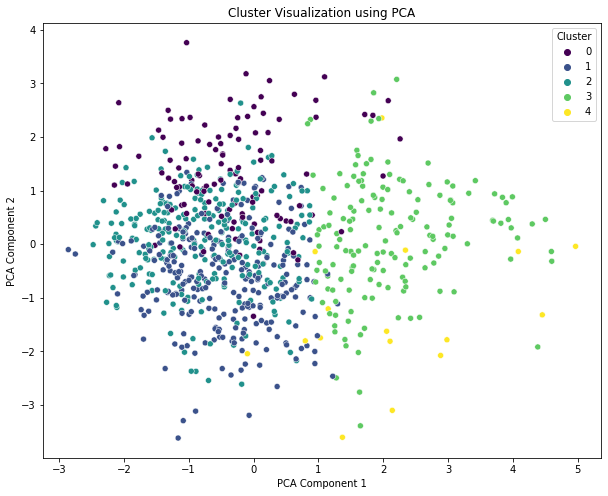

クラスタリング結果を含むデータを spotify_2023_clustered.csv に出力しました。


In [4]:
# クラスタリングに使用する特徴量を選定
features = ['bpm', 'key', 'mode', 'danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
X = spotify_data[features]

# データの標準化
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 欠損値を含む行を削除
spotify_data_clean = spotify_data.dropna()
X_clean = spotify_data_clean[features]
X_scaled_clean = scaler.fit_transform(X_clean)

# K-meansクラスタリングの実行
kmeans = KMeans(n_clusters=5, random_state=0)
spotify_data_clean['cluster'] = kmeans.fit_predict(X_scaled_clean)

# 各クラスタの特徴を確認
cluster_centers_clean = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_df_clean = pd.DataFrame(cluster_centers_clean, columns=features)
cluster_df_clean['cluster'] = range(5)

# クラスタの中心を表示
print(cluster_df_clean)

# PCAを使用して2次元に圧縮
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled_clean)
spotify_data_clean['pca1'] = principal_components[:, 0]
spotify_data_clean['pca2'] = principal_components[:, 1]

# クラスタリング結果を可視化
plt.figure(figsize=(10, 8))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=spotify_data_clean, palette='viridis')
plt.title('Cluster Visualization using PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

# クラスタリング結果を含むデータフレーム全体をCSVファイルとして出力
output_file_path = 'spotify_2023_clustered.csv'
spotify_data_clean.to_csv(output_file_path, index=False)

print(f"クラスタリング結果を含むデータを {output_file_path} に出力しました。")